In [1]:
from horemheb.config import AnalysisConfig
from horemheb.loader import load_temperature_data
from horemheb.segments import process_segments
from horemheb.paths import data_dir
from horemheb.optimize import (optimize_cooling_system, 
                               plot_parametric_curves, 
                               plot_combined_parametric_curves, 
                               plot_optimize_k3_over_k1_k2,
                               plot_all_segments_with_solution)

In [2]:
# Configure analysis parameters
config = AnalysisConfig(
    delay_time=0, #80, #300, #240, #80, #240, #180, #120,
    before_sunrise_delta_minutes=0,
    resample_minutes=5
)

temperature_data_file_old_door = 'temperature_logB_12.csv'
temperature_data_file = 'temperature_logC_2025-03-12.csv'

# Filter New Door data after the specified timestamp
cutoff_time = '2025-02-27 19:48:04'

---
### Old Door

In [3]:
# Old Door
dfo, dfo_r1, dfo_r2 = load_temperature_data(
    data_dir / temperature_data_file,
    config,
    cutoff_time=cutoff_time,
    comparison='<='
)

segments_old = process_segments(dfo_r1, dfo_r2, config)

Precomputing data for segments...
Starting optimization with multiple initial points...
Calculating confidence intervals...

---Old Door---

Parameters:
k1 = 0.700000 (fixed)
k2 = 0.070000 (fixed)
k3 = 0.037489 ± 76.472885
k4 = 0.000000 (fixed)

Goodness of fit:
R-squared = 0.9737


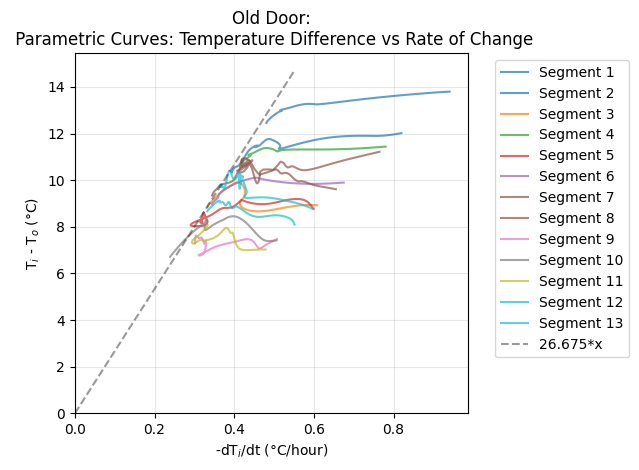

In [4]:
results = optimize_cooling_system(segments_old, "Old Door", fixed_params={'k1': 0.7,'k2': 0.07, 'k4': 0.0}) #'k1': 0.7, 'k2': 0.07, 'k4': 0.0})

plot_parametric_curves(segments_old, results, "Old Door")

Running grid search...
........

Old Door Best parameter combination:
K$_1$ = 0.800000
K$_2$ = 0.070000
K$_3$ = 0.038759
R$^2$ = 0.974090

Old Door Best parameters: {'k1': 0.8, 'k2': 0.07, 'k4': 0.0}


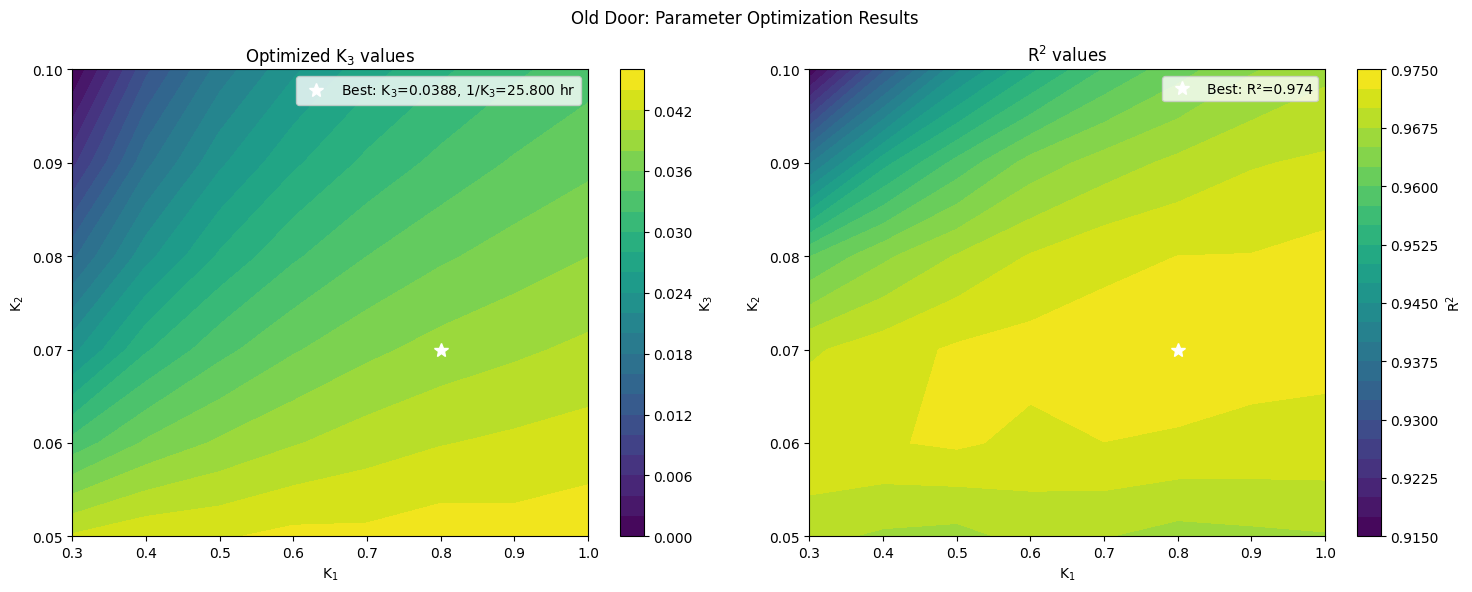

In [5]:
grid_best_result = plot_optimize_k3_over_k1_k2(segments_old, 
                                               "Old Door", 
                                               k1_values=[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3])

Precomputing data for segments...
Starting optimization with multiple initial points...
Calculating confidence intervals...

---Old Door---

Parameters:
k1 = 0.800000 (fixed)
k2 = 0.070000 (fixed)
k3 = 0.038759 ± 80.396820
k4 = 0.000000 (fixed)

Goodness of fit:
R-squared = 0.9741


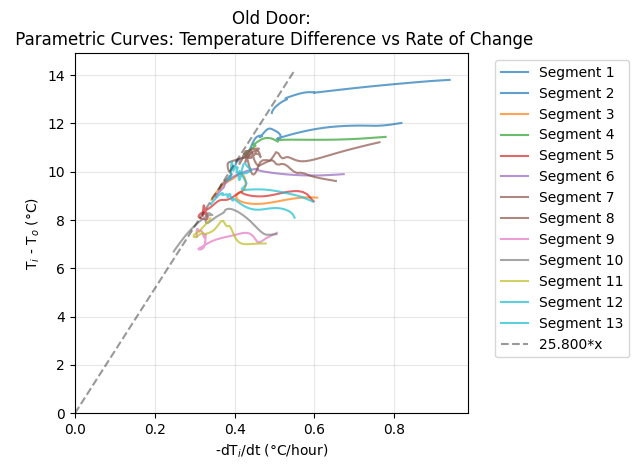

In [6]:
results_old = optimize_cooling_system(segments_old, "Old Door", fixed_params={'k1': 0.8,'k2': 0.07, 'k4': 0.0}) #'k1': 0.7, 'k2': 0.07, 'k4': 0.0})

plot_parametric_curves(segments_old, results_old, "Old Door")

---
### New Door

In [7]:
# New Door
dfn, dfn_r1, dfn_r2 = load_temperature_data(
    temperature_data_file,
    config,
    cutoff_time=cutoff_time,
    comparison='>='
)

# Find and process segments
segments_new = process_segments(dfn_r1, dfn_r2, config)

Precomputing data for segments...
Starting optimization with multiple initial points...
Calculating confidence intervals...

---New Door---

Parameters:
k1 = 0.700000 (fixed)
k2 = 0.070000 (fixed)
k3 = 0.034645 ± 69.172197
k4 = 0.000000 (fixed)

Goodness of fit:
R-squared = 0.9836


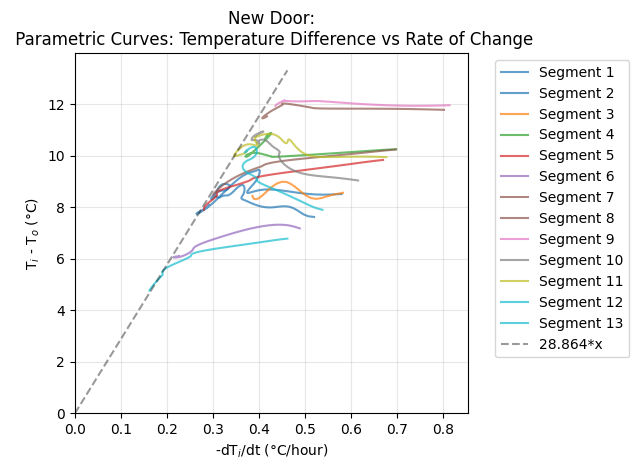

In [8]:
# new segment #10 hangs or takes a long time to optimize:
results = optimize_cooling_system(segments_new[:9] + segments_new[10:], "New Door", fixed_params={'k1': 0.7,'k2': 0.07, 'k4': 0.0}) #'k1': 0.7, 'k2': 0.07, 'k4': 0.0})
# ... but it is fine to include #10 in the plot (even though the results were calculated without it):
plot_parametric_curves(segments_new[:(9+1)] + segments_new[10:], results, "New Door")

Running grid search...
........

New Door Best parameter combination:
K$_1$ = 0.500000
K$_2$ = 0.060000
K$_3$ = 0.035605
R$^2$ = 0.984746

New Door Best parameters: {'k1': 0.5, 'k2': 0.06, 'k4': 0.0}


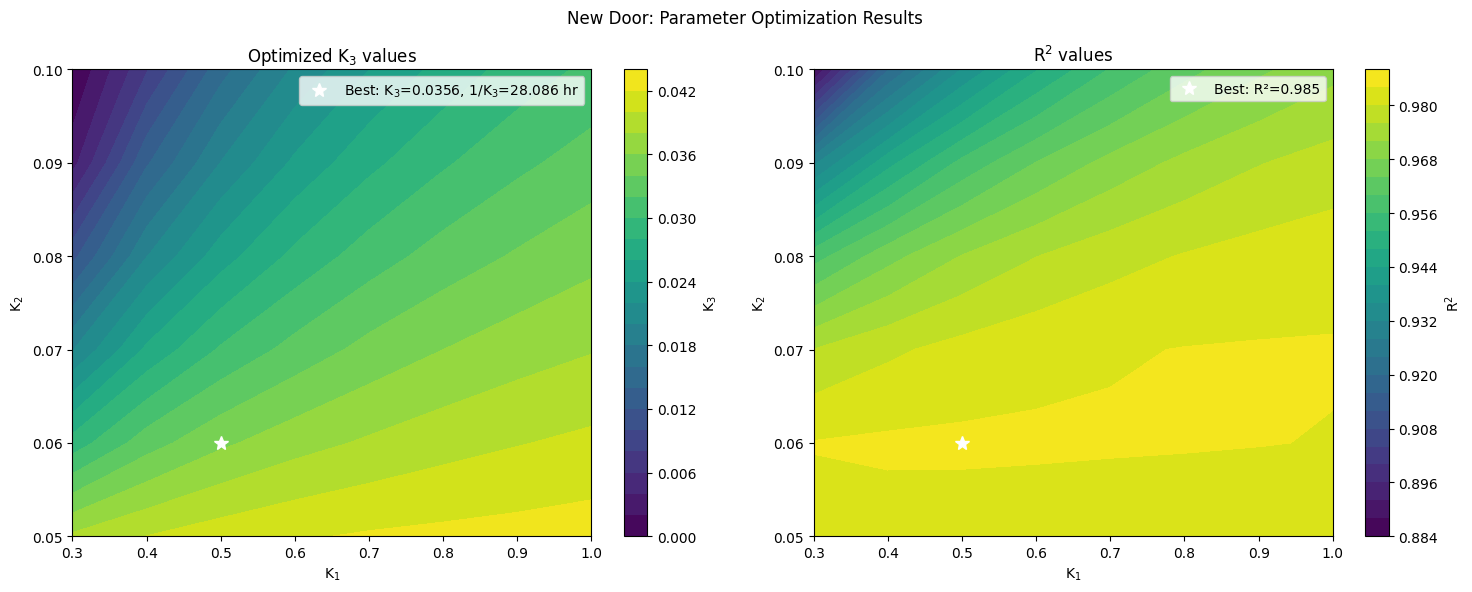

In [9]:
grid_best_result = plot_optimize_k3_over_k1_k2(segments_new[:9] + segments_new[10:], 
                                               "New Door", 
                                               k1_values=[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3])

Precomputing data for segments...
Starting optimization with multiple initial points...
Calculating confidence intervals...

---New Door---

Parameters:
k1 = 0.500000 (fixed)
k2 = 0.060000 (fixed)
k3 = 0.035605 ± 60.957112
k4 = 0.000000 (fixed)

Goodness of fit:
R-squared = 0.9847


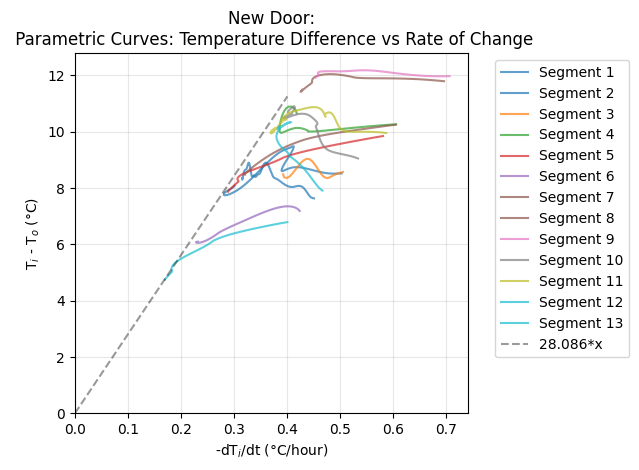

In [10]:
# new segment #10 hangs or takes a long time to optimize:
results_new = optimize_cooling_system(segments_new[:9] + segments_new[10:], "New Door", fixed_params={'k1': 0.5,'k2': 0.06, 'k4': 0.0}) #'k1': 0.7, 'k2': 0.07, 'k4': 0.0})
# ... but it is fine to include #10 in the plot (even though the results were calculated without it):
plot_parametric_curves(segments_new[:(9+1)] + segments_new[10:], results_new, "New Door")

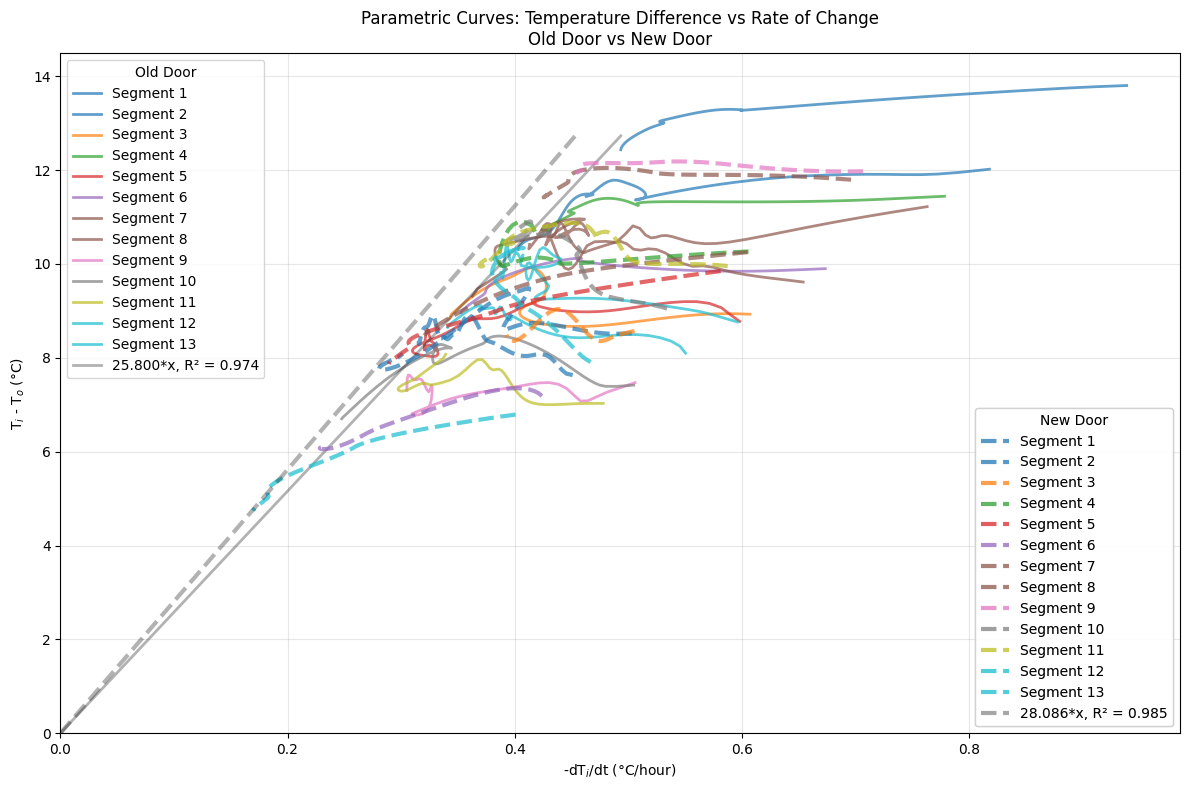

In [11]:
plot_combined_parametric_curves(segments_old, results_old, "Old Door", segments_new, results_new, "New Door")


In [12]:
results = optimize_cooling_system(segments_old, "Old Door", fixed_params={'k1': 0.7,'k2': 0.07, 'k4': 0.0}) #'k1': 0.7, 'k2': 0.07, 'k4': 0.0})

Precomputing data for segments...
Starting optimization with multiple initial points...
Calculating confidence intervals...

---Old Door---

Parameters:
k1 = 0.700000 (fixed)
k2 = 0.070000 (fixed)
k3 = 0.037489 ± 76.503587
k4 = 0.000000 (fixed)

Goodness of fit:
R-squared = 0.9737


---
Plot the segments with the cooling solutions.

In [13]:
results_old

{'k1': 0.8,
 'k2': 0.07,
 'k3': 0.03875927397023848,
 'k4': 0.0,
 'R-squared': 0.974090215549085}

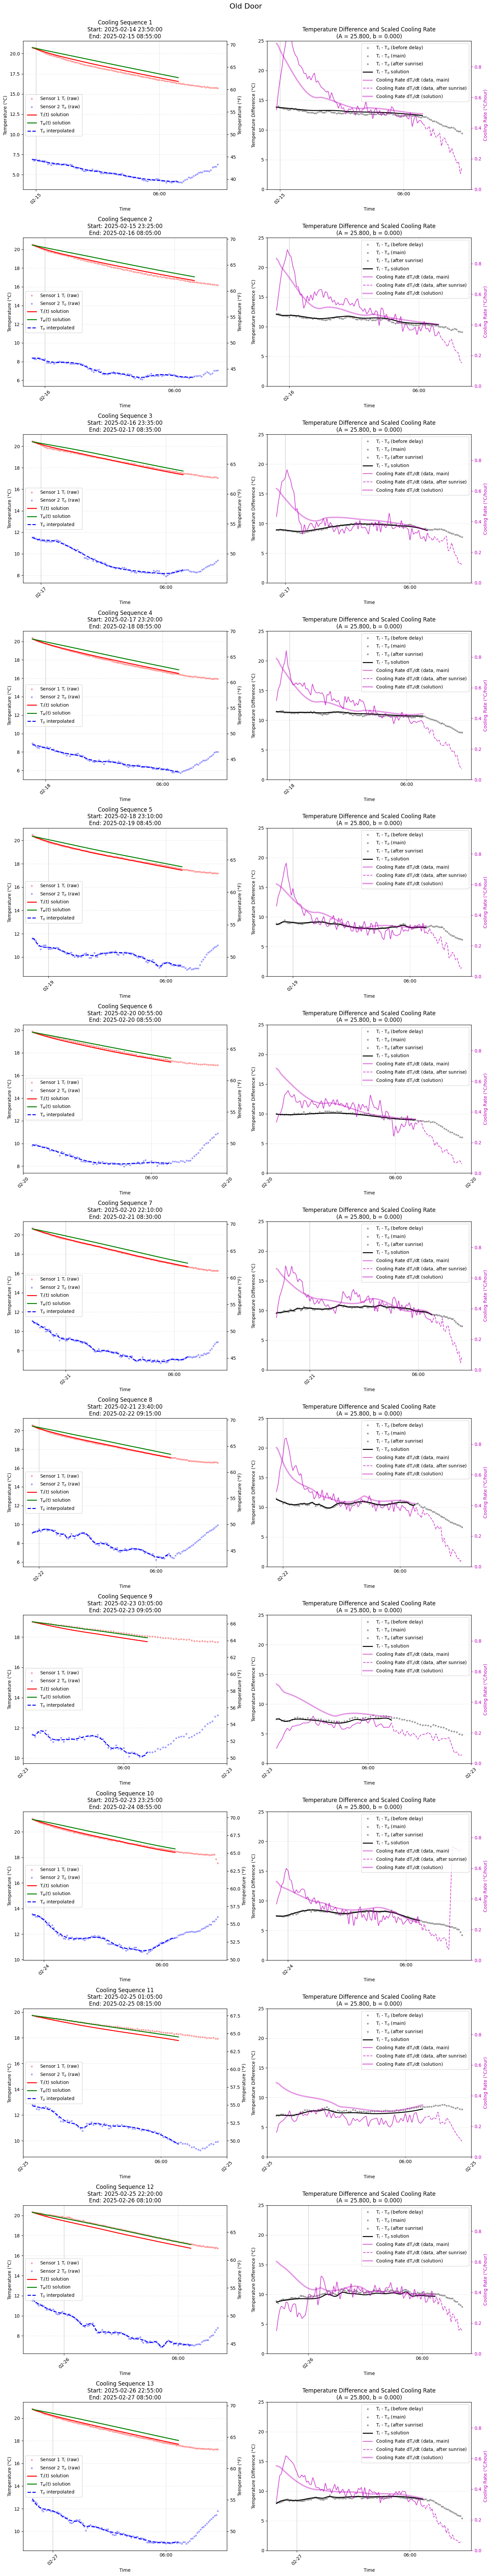

In [14]:
plot_all_segments_with_solution(segments_old, results_old, "Old Door")

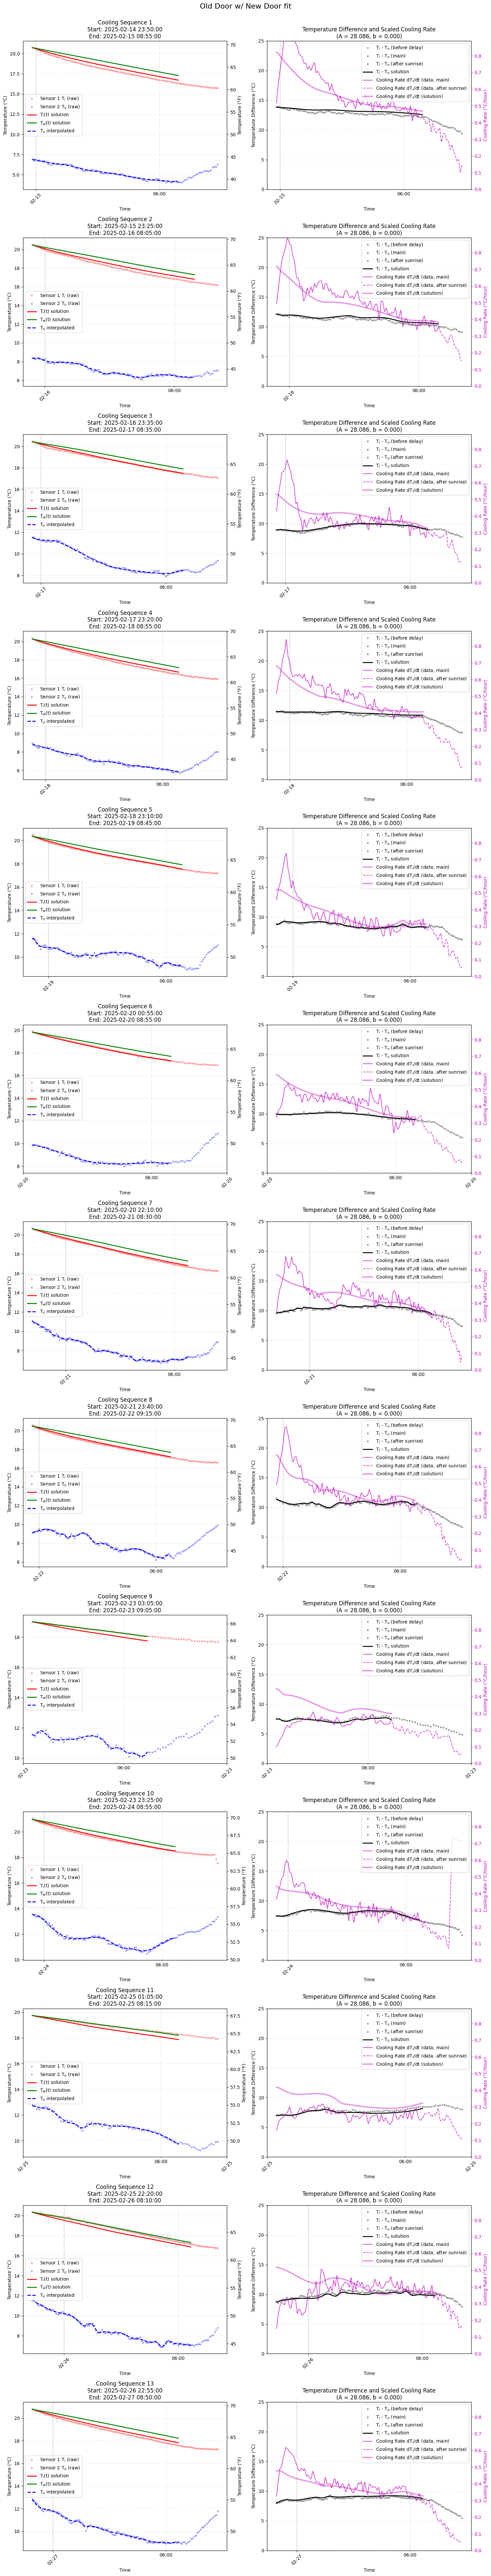

In [15]:
plot_all_segments_with_solution(segments_old, results_new, "Old Door w/ New Door fit")

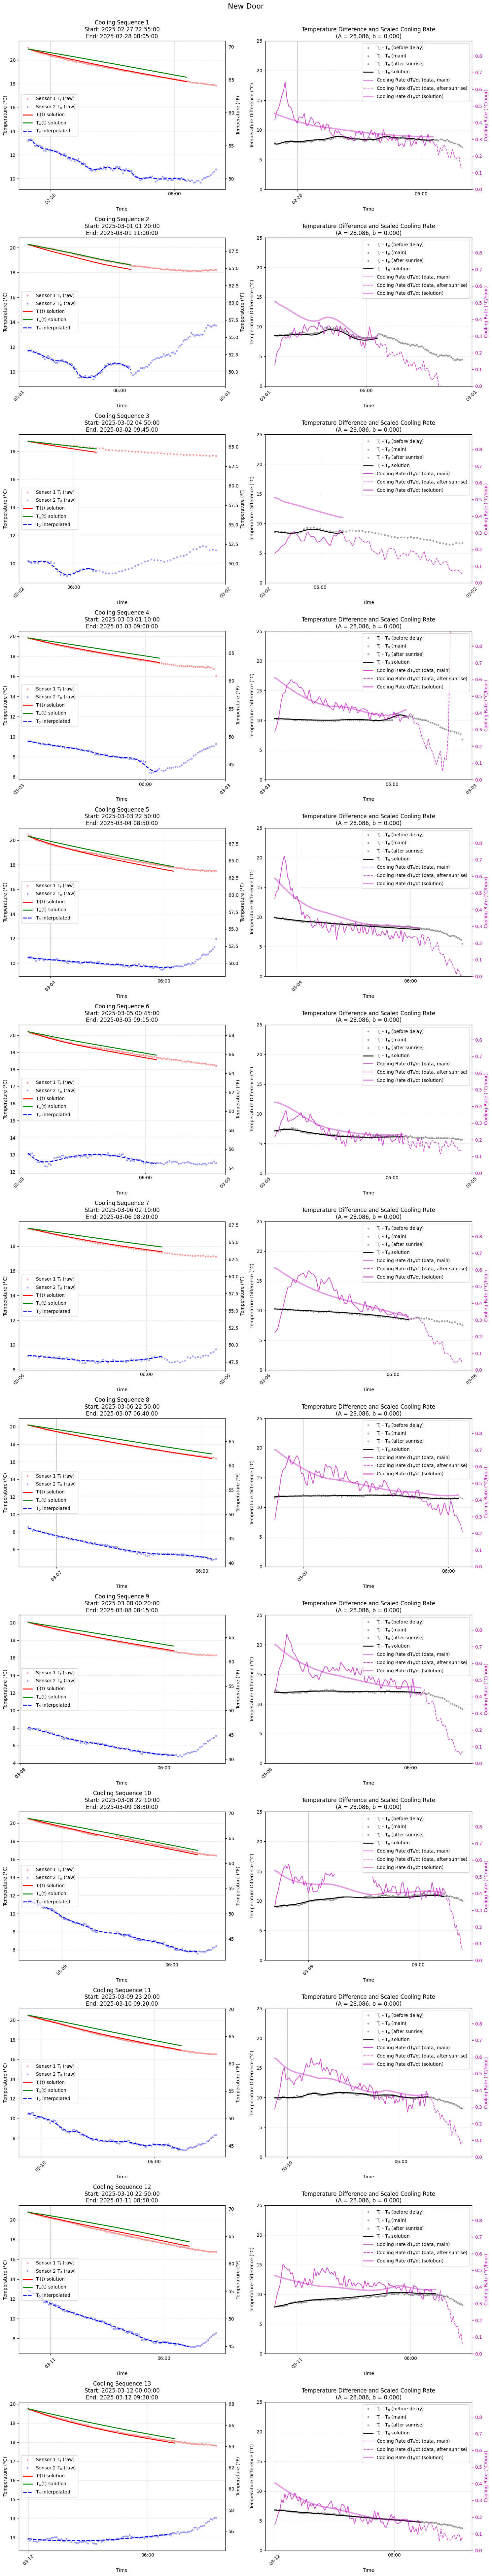

In [16]:
plot_all_segments_with_solution(segments_new, results_new, "New Door")

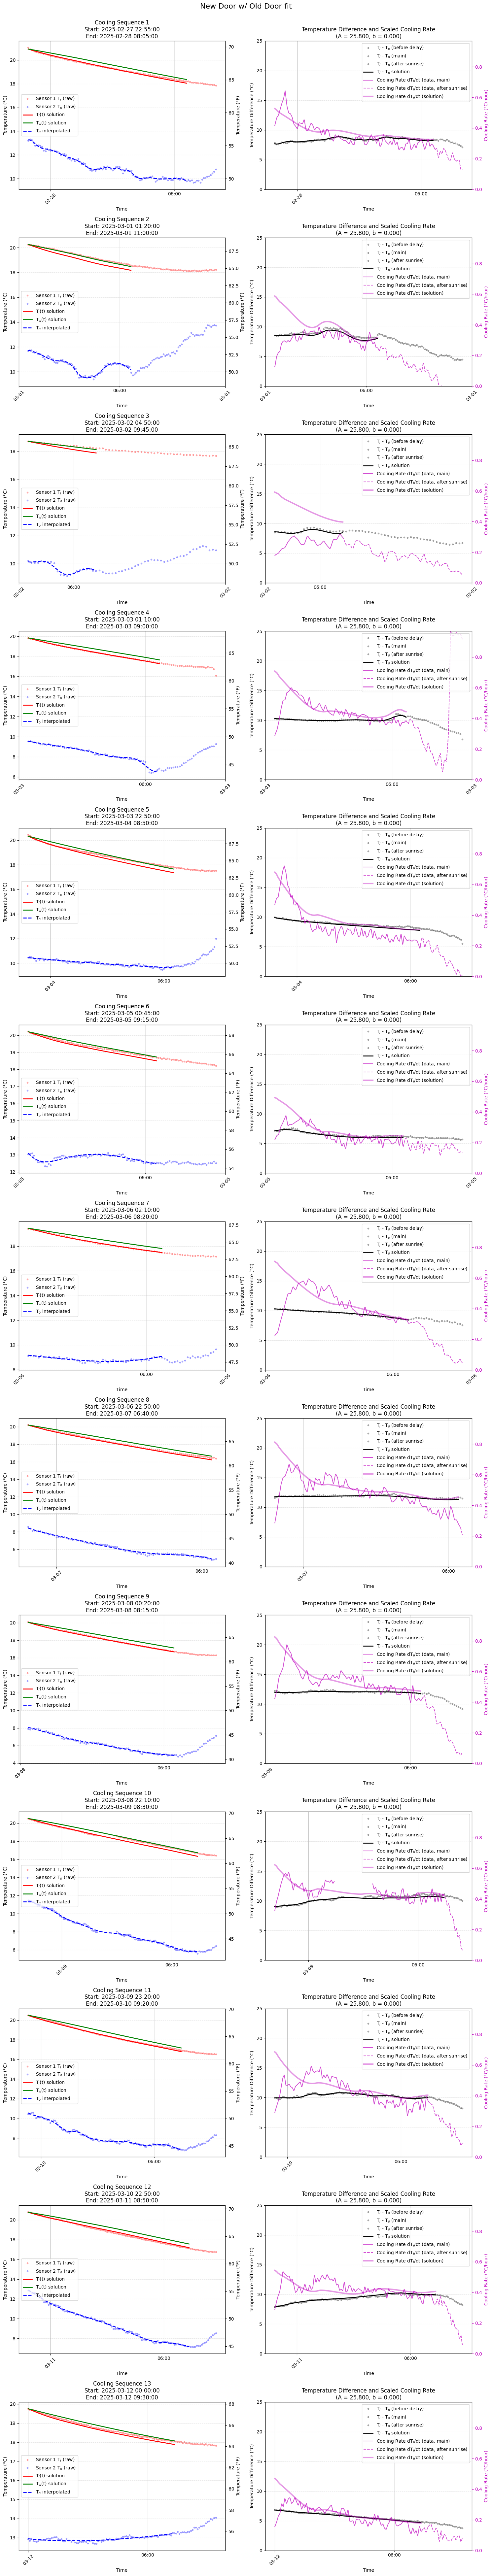

In [17]:
plot_all_segments_with_solution(segments_new, results_old, "New Door w/ Old Door fit")